In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('accessories.csv', encoding='utf-8-sig')

#The data set shows accessories from the game animal crossing. The goal here is to see if spectral clustering can be used to find if the first color 
#of an item can be related to how that item is priced in game.

In [3]:
#clean the data set 
df['Buy'] = pd.to_numeric(df['Buy'].replace('NFS', np.nan), errors='coerce')
df_clean = df.dropna(subset=['Buy'])

In [4]:
#encode color 1
le = LabelEncoder()
color_encoded = le.fit_transform(df_clean['Color 1'])

In [5]:
# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(np.column_stack((df_clean['Buy'], color_encoded)))

In [6]:
# Perform spectral clustering
n_clusters = 5
spectral = SpectralClustering(n_clusters=n_clusters, affinity='rbf',random_state=42)
cluster_labels = spectral.fit_predict(X)

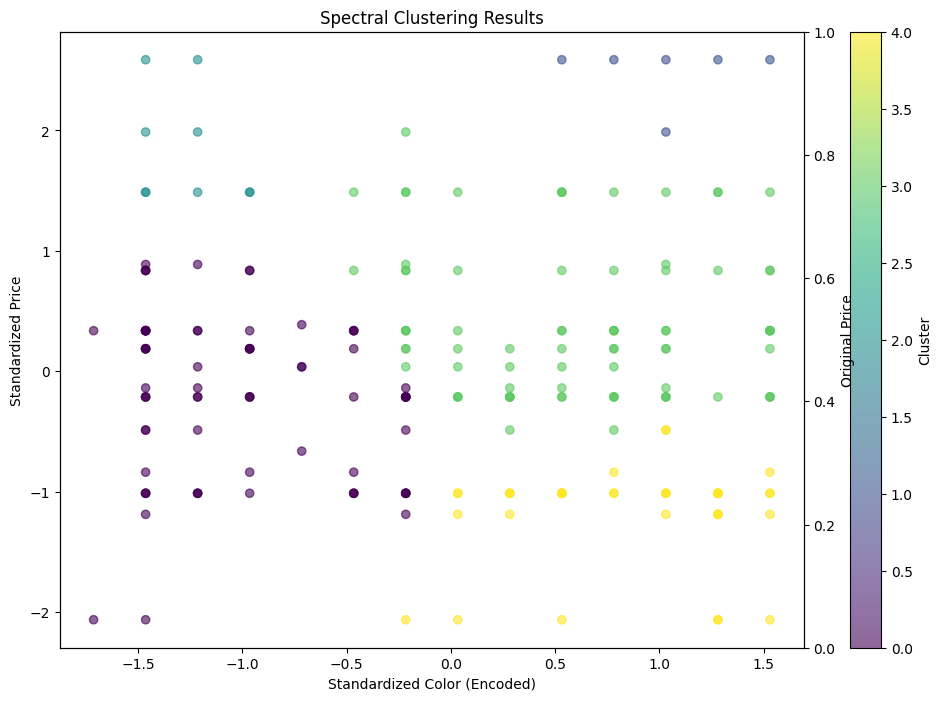

In [11]:
# Create visualization using pure matplotlib and add the orginal price tickets on second y-axis
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X[:, 1], X[:, 0], c=cluster_labels, cmap='viridis',alpha=0.6)

plt.colorbar(scatter, label='Cluster')
plt.xlabel('Standardized Color (Encoded)')
plt.ylabel('Standardized Price')
plt.title('Spectral Clustering Results')

ax2 = plt.gca().twinx()
original_prices = scaler.inverse_transform(X)[:, 0]
ax2.set_ylabel('Original Price')
plt.show()

In [12]:
# Print clustering statistics
print('\Number of items in each cluster:')
for i in range(n_clusters):
    print(f'Cluster {i}: {np.sum(cluster_labels == i)} items')

Number of items in each cluster:
Cluster 0: 76 items
Cluster 1: 6 items
Cluster 2: 9 items
Cluster 3: 79 items
Cluster 4: 40 items


In [13]:
# Calculate silhouette score to show how well seperated the clusters are from eacch other
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f'\Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.333


In [ ]:
#Overall price is not affected by color 1 from the graph shown. If color 1 had an affect on price there would be 
#clear diagonal patterns. There are points of the same color being spread aross different color values telling us that simialr prices
#occur regardless of the color.